In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ph-data.csv')


In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [4]:
def get_acidity_base_level(df):
    if df['label'] >= 0 and df['label'] < 1:
        return "Strongly Acidic"
    elif df['label'] >= 1 and df['label'] < 3:
        return "Very Acidic"
    elif df['label'] >= 3 and df['label'] < 4:
        return "Acidic"
    elif df['label'] >= 4 and df['label'] < 6:
        return "Moderately Acidic"
    elif df['label'] >= 6 and df['label'] < 7:
        return "Slightly Acidic"
    elif df['label'] == 7:
        return "Neutral"
    elif df['label'] > 7 and df['label'] < 8:
        return "Slightly Alkaline"
    elif df['label'] >= 8 and df['label'] < 10:
        return "Moderately Alkaline"
    elif df['label'] >= 10 and df['label'] < 11:
        return "Alkaline"
    elif df['label'] >= 11 and df['label'] < 14:
        return "Very Alkaline"
    else:
        return "Invalid pH Range"


In [5]:
df['ph'] = df.apply(get_acidity_base_level, axis=1)
df

,blue,green,red,label,ph
0,36,27,231,0,Strongly Acidic
1,36,84,250,1,Very Acidic
2,37,164,255,2,Very Acidic
3,22,205,255,3,Acidic
4,38,223,221,4,Moderately Acidic
...,...,...,...,...,...
648,201,123,0,10,Alkaline
649,203,51,46,11,Very Alkaline
650,169,62,48,12,Very Alkaline
651,173,37,79,13,Very Alkaline


<Axes: xlabel='label', ylabel='count'>

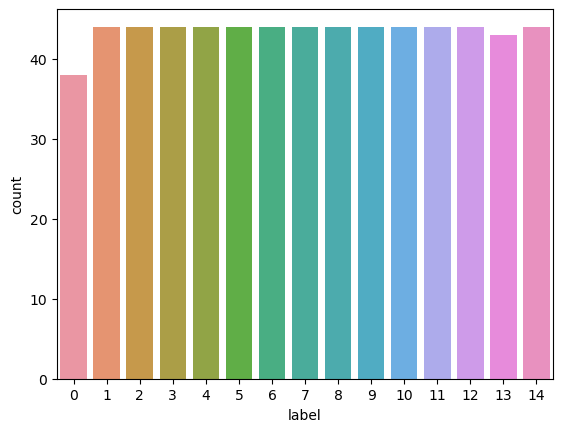

In [6]:
sns.countplot(x='label',data=df)

[Text(0, 0, 'Strongly Acidic'),
 Text(1, 0, 'Very Acidic'),
 Text(2, 0, 'Acidic'),
 Text(3, 0, 'Moderately Acidic'),
 Text(4, 0, 'Slightly Acidic'),
 Text(5, 0, 'Neutral'),
 Text(6, 0, 'Moderately Alkaline'),
 Text(7, 0, 'Alkaline'),
 Text(8, 0, 'Very Alkaline'),
 Text(9, 0, 'Invalid pH Range')]

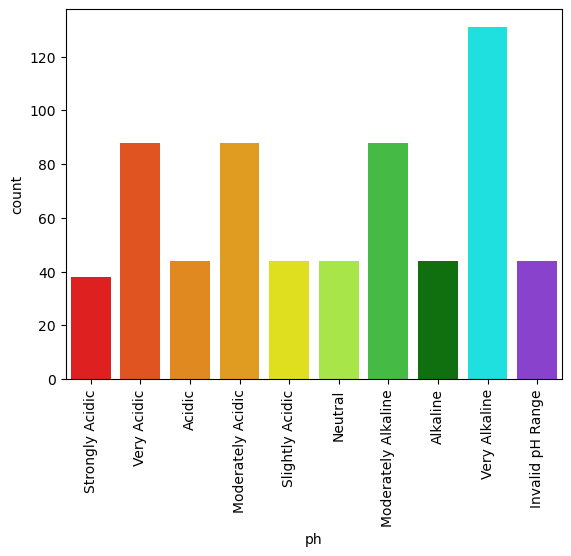

In [7]:
standard_ph_colors = ['#FF0000', '#FF4500', '#FF8C00', '#FFA500', '#FFFF00', '#ADFF2F', '#32CD32', '#008000', '#00FFFF', '#8A2BE2']
ax = sns.countplot(x='ph', data=df, palette=standard_ph_colors)
ax.set_xticklabels(['Strongly Acidic', 'Very Acidic', 'Acidic', 'Moderately Acidic', 'Slightly Acidic', 'Neutral', 'Moderately Alkaline', 'Alkaline', 'Very Alkaline', 'Invalid pH Range'], rotation=90)



In [8]:
df_result_1 = df['label']
df_result_2 = df['ph']
df_inputs = df.drop(['label', 'ph'], axis=1)
X_train, X_test, y_train_1, y_test_1 = train_test_split(df_inputs, df_result_1, test_size=0.25, random_state=1)
y_train_2 = df['ph'].iloc[y_train_1.index]
y_test_2 = df['ph'].iloc[y_test_1.index]

In [9]:
rf_model = RandomForestClassifier(n_estimators=8, max_depth=6)
rf_model.fit(X_train, y_train_2)

RandomForestClassifier(max_depth=6, n_estimators=8)

In [10]:
import joblib
joblib.dump(rf_model, 'RF_model.pkl')

['RF_model.pkl']